# 1. Twitch API data

The URL `https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}` is an API from twitch to get data from twitch channels.

Get the data from the following channels:

```
["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
```

To make into a dataframe that looks like this:

![](twitch.png)

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

In [18]:

#Find existing channels first

channels = ["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]

cols = ['id', 'display_name', 'status', 'followers', 'views']

existing_channels = []

for channel in channels:
    r = requests.get(f"https://wind-bow.glitch.me/twitch-api/channels/{channel}").json()
    if 'error' not in r:
        existing_channels.append([r['_id'], r['display_name'], r['status'],
                             r['followers'], r['views']])
        
existing_channels

[[30220059,
  'ESL_SC2',
  'RERUN: StarCraft 2 - Terminator vs. Parting (PvP) - IEM Katowice 2015 - EU Qualifier',
  135394,
  60991791],
 [71852806,
  'OgamingSC2',
  'UnderDogs - Rediffusion - Qualifier.',
  40895,
  20694507],
 [90401618, 'cretetion', "It's a Divison kind of Day", 908, 11631],
 [79776140,
  'FreeCodeCamp',
  'Greg working on Electron-Vue boilerplate w/ Akira #programming #vuejs #electron',
  10122,
  163747],
 [86238744, 'storbeck', None, 10, 1019],
 [6726509, 'Habathcx', 'Massively Effective', 14, 764],
 [54925078, 'RobotCaleb', 'Code wrangling', 20, 4602],
 [82534701,
  'noobs2ninjas',
  'Building a new hackintosh for #programming and gaming and having a few beers! Lets do this! #pcbuilding ',
  835,
  48102]]

In [19]:
df = pd.DataFrame(existing_channels, columns=cols)
df

,id,display_name,status,followers,views
0,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
1,71852806,OgamingSC2,UnderDogs - Rediffusion - Qualifier.,40895,20694507
2,90401618,cretetion,It's a Divison kind of Day,908,11631
3,79776140,FreeCodeCamp,Greg working on Electron-Vue boilerplate w/ Ak...,10122,163747
4,86238744,storbeck,None,10,1019
5,6726509,Habathcx,Massively Effective,14,764
6,54925078,RobotCaleb,Code wrangling,20,4602
7,82534701,noobs2ninjas,Building a new hackintosh for #programming and...,835,48102


# 2. App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 

- The app ID. This can be found in the web page for the app right after `id`. For instance, Candy Crush's US webpage is:

`https://apps.apple.com/us/app/candy-crush-saga/id553834731`

So here the ID would be `553834731`.

- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

### 2.1 English app reviews

Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!).

### 2.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.

### 2.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?

Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [5]:
#2.1) English app reviews


#Create a function that takes in IDs and returns a dataframe of reviews for the given ID(s)

en_countries = ['au','ca', 'gb', 'nz', 'us']
page_list = range(1,5)

def store_scrape(id_):
    df_final = pd.DataFrame(columns = ['im:version','im:rating', 'title', 'content'])
    for country in en_countries:
        for page in page_list:
            r = requests.get(f"https://itunes.apple.com/{country}/rss/customerreviews/id={id_}/page={page}/sortby=mostrecent/json").json()
            df = pd.DataFrame(r['feed']['entry'])
            df['title'] = df['title'].apply(lambda x: x['label'])
            df['im:version'] = df['im:version'].apply(lambda x: x['label'])
            df['im:rating'] = df['im:rating'].apply(lambda x: x['label'])
            df['content'] = df['content'].apply(lambda x: x['label'])
            df['app'] = id_
            df = df.drop(columns=['author', 'id', 'link', 'im:voteSum', 'im:contentType', 'im:voteCount'])
            df_final = pd.concat([df_final, df], axis = 0)
    return df_final

In [6]:
candycrush = store_scrape(553834731)
twitter = store_scrape(333903271)
facebook = store_scrape(284882215)
tinder = store_scrape(547702041)

new_df = candycrush.append(twitter)
new_df = new_df.append(facebook)
new_df = new_df.append(tinder)

new_df.app = (new_df.app.replace(333903271.0, 'twitter').replace(284882215.0, 'facebook')
              .replace(547702041.0, 'tinder').replace(553834731.0, 'candycrush'))

new_df

,im:version,im:rating,title,content,app
0,1.196.1.1,2,Constant connection errors,"For the last couple of years, Ihave been unabl...",candycrush
1,1.196.1.1,5,Feedback,Love this game too. It would be better if you ...,candycrush
2,1.196.1.1,1,"Starting over, what???","I was doing so well, then I came to a black sc...",candycrush
3,1.196.1.1,1,Boring,"Repetitive game, which after a short time beco...",candycrush
4,1.196.1.1,4,Brilliant App,"I love it, it’s multiplayer I’m not sure it sh...",candycrush
...,...,...,...,...,...
45,12.2.0,1,Pathetic,This app used to be amazing but now I don’t ha...,tinder
46,12.2.0,1,tons of bugs and crashes,insane amount of bugs and always crashes no ma...,tinder
47,12.2.0,3,Discovery doesn’t work,How many times do I have to swipe left and rig...,tinder
48,12.2.0,2,"More locals, please!","Hey, Tinder mods! Can you guys please update y...",tinder


In [7]:
#2.2) Best version
import matplotlib.pyplot as plt
import seaborn as sns

#Candy crush
candycrush['im:rating'] = candycrush['im:rating'].astype(int)

best_version = candycrush.groupby('im:version', as_index = False)['im:rating'].mean()
print("Best candy crush version: " + str(best_version.max()))

#Twitter
twitter['im:rating'] = twitter['im:rating'].astype(int)

best_version = twitter.groupby('im:version', as_index = False)['im:rating'].mean()
print("Best twitter version: " + str(best_version.max()))

#facebook
facebook['im:rating'] = facebook['im:rating'].astype(int)

best_version = facebook.groupby('im:version', as_index = False)['im:rating'].mean()
print("Best facebook version: " + str(best_version.max()))

#Tinder
tinder['im:rating'] = tinder['im:rating'].astype(int)

best_version = tinder.groupby('im:version', as_index = False)['im:rating'].mean()
print("Best tinder version: " + str(best_version.max()))

Best candy crush version: im:version    1.197.0.1
im:rating             5
dtype: object
Best twitter version: im:version    8.8
im:rating     5.0
dtype: float64
Best facebook version: im:version    308.0
im:rating       3.0
dtype: float64
Best tinder version: im:version    12.3.0
im:rating          5
dtype: object


Text(0.5, 1.0, 'Tinder')

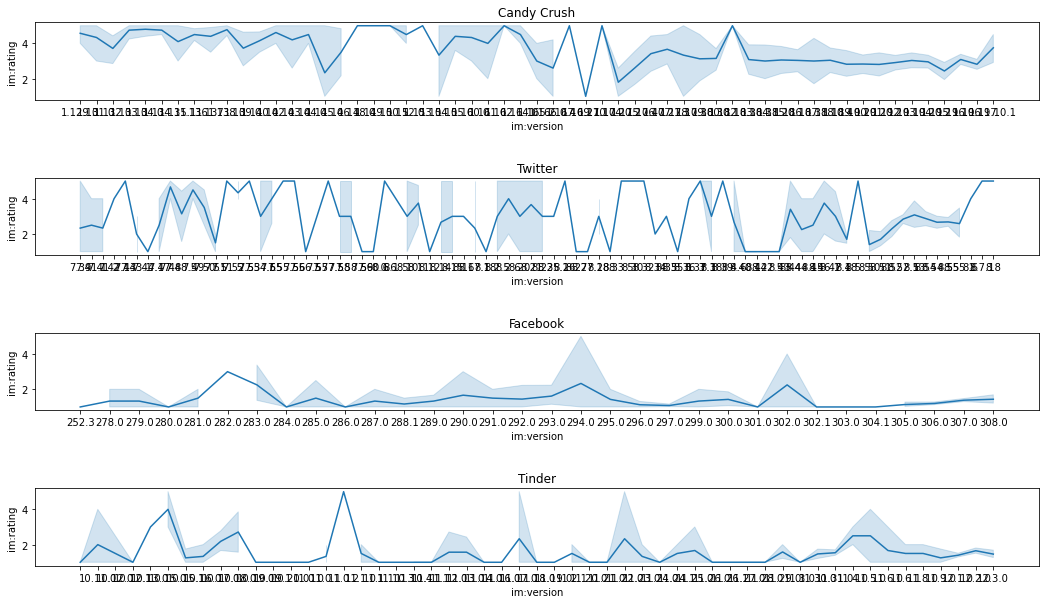

In [8]:
fig, axes = plt.subplots(4,1, figsize=(18,10))
fig.subplots_adjust(hspace=1)


sns.lineplot(ax=axes[0], x = candycrush['im:version'], 
                         y = candycrush['im:rating'],)
axes[0].set_title("Candy Crush")

sns.lineplot(ax=axes[1],x = twitter['im:version'], 
                        y = twitter['im:rating'],)
axes[1].set_title("Twitter")

sns.lineplot(ax=axes[2],x = facebook['im:version'], 
                        y = facebook['im:rating'],)
axes[2].set_title("Facebook")

sns.lineplot(ax=axes[3],x = tinder['im:version'], 
                        y = tinder['im:rating'],)
axes[3].set_title("Tinder")

In [104]:
#2.3) Top words
#First use str get dummies to find the most used word for 1 star and 5 star reviews

#Candy Crush reviews
candycrush1 = candycrush[candycrush['im:rating'] == 1]
ccdummies_1 = candycrush1.title.str.get_dummies(' ')
print('Candy Crush 1-star Rating: ', ccdummies_1.sum(axis=0).sort_values(ascending=False)[0:1])

candycrush5 = candycrush[candycrush['im:rating'] == 5]
ccdummies_5 = candycrush5.title.str.get_dummies(' ')
print('Candy Crush 5-star Rating: ', ccdummies_5.sum(axis=0).sort_values(ascending=False)[0:1])

#Twitter reviews
twitter1 = twitter[twitter['im:rating'] == 1]
twdummies_1 = twitter1.title.str.get_dummies(' ')
print('Twitter 1-star Rating: ', twdummies_1.sum(axis=0).sort_values(ascending=False)[0:1])

twitter5 = twitter[twitter['im:rating'] == 5]
twdummies_5 = twitter5.title.str.get_dummies(' ')
print('Twitter 5-star Rating: ', twdummies_5.sum(axis=0).sort_values(ascending=False)[0:1])

#Facebook reviews
facebook1 = facebook[facebook['im:rating'] == 1]
fbdummies_1 = facebook1.title.str.get_dummies(' ')
print("Facebook 1-start rating: ", fbdummies_1.sum(axis=0).sort_values(ascending=False)[0:1])

facebook5 = facebook[facebook['im:rating'] == 5]
fbdummies_5 = facebook5.title.str.get_dummies(' ')
print("Facebook 5-start rating: ", fbdummies_5.sum(axis=0).sort_values(ascending=False)[0:1])

#Tinder reviews
tinder1 = tinder[tinder['im:rating'] == 1]
tidummies_1 = tinder1.title.str.get_dummies(' ')
print("Tinder 1-start rating: ", tidummies_1.sum(axis=0).sort_values(ascending=False)[0:1])

tinder5 = tinder[tinder['im:rating'] == 5]
tidummies_5 = tinder5.title.str.get_dummies(' ')
print("Tinder 5-start rating: ", tidummies_5.sum(axis=0).sort_values(ascending=False)[0:1])

Candy Crush 1-star Rating:  game    29
dtype: int64
Candy Crush 5-star Rating:  Candy    66
dtype: int64
Twitter 1-star Rating:  Twitter    54
dtype: int64
Twitter 5-star Rating:  Twitter    47
dtype: int64
Facebook 1-start rating:  Censorship    69
dtype: int64
Facebook 5-start rating:  update    2
dtype: int64
Tinder 1-start rating:  for    98
dtype: int64
Tinder 5-start rating:  my    6
dtype: int64


***The results above include words such as "for" and "my" which does not tell much compared to facebook's most used word negative reviews which is "censorship". So I thought it would be interesting to make word clouds for 1 star and 5 star reviews for each app to see a better picture of the most words used in the reviews***

In [107]:
from wordcloud import WordCloud, STOPWORDS

#Function that takes in one of the above created dataframes and returns a word cloud based on the ['content'] column

def word_cloud(df):
    dfname = [x for x in globals() if globals()[x] is df][0]
    print(dfname)
    comment_words = '' 
    stop_words = set(STOPWORDS)

    for i in df['content']: 
        i = str(i) 
        separate = i.split() 
        for j in range(len(separate)): 
            separate[j] = separate[j].lower() 

        comment_words += " ".join(separate)+" "

    final_wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black', 
                    stopwords = stop_words, 
                    min_font_size = 10).generate(comment_words)

    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(final_wordcloud) 
    plt.axis("off")
    plt.tight_layout(pad = 0) 
    
    plt.title(dfname)
    plt.show()

candycrush1


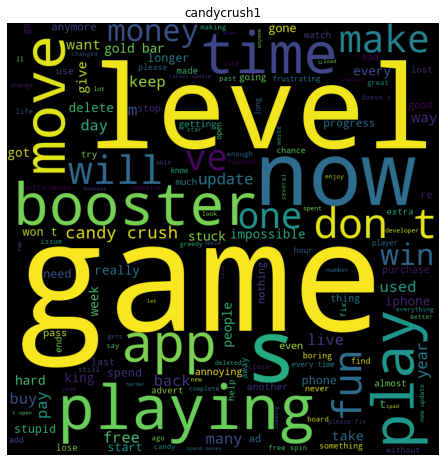

candycrush5


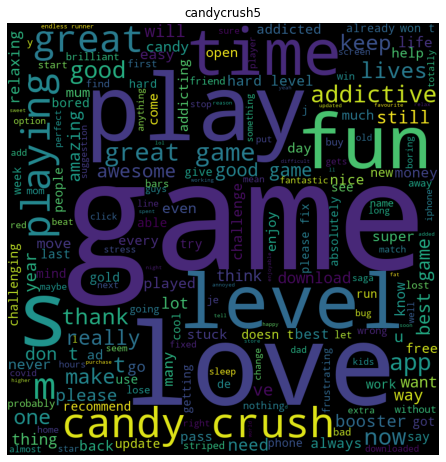

twitter1


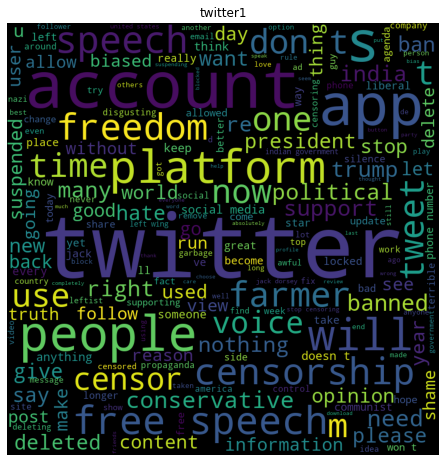

twitter5


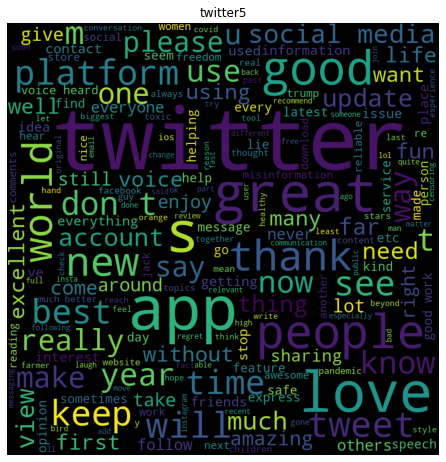

facebook1


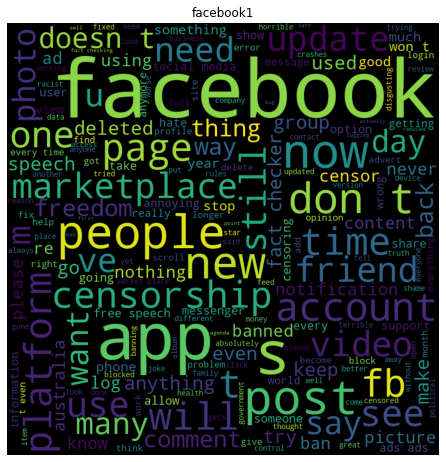

facebook5


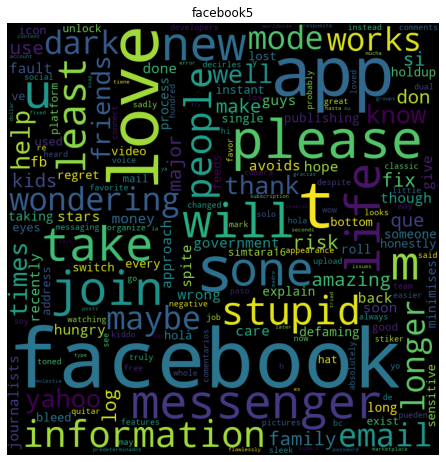

tinder1


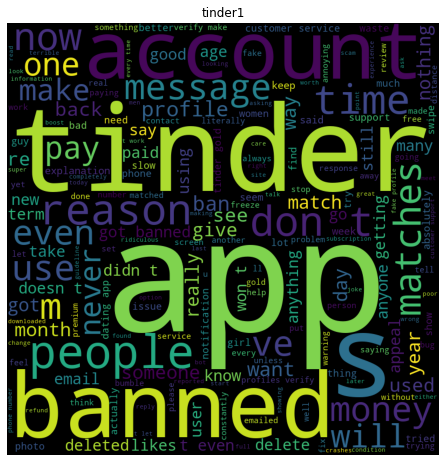

tinder5


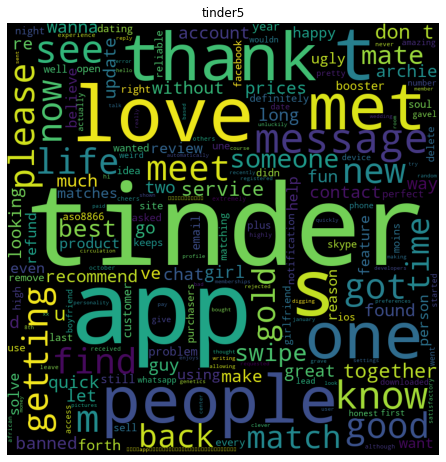

In [106]:
word_cloud(candycrush1)
word_cloud(candycrush5)
word_cloud(twitter1)
word_cloud(twitter5)
word_cloud(facebook1)
word_cloud(facebook5)
word_cloud(tinder1)
word_cloud(tinder5)

# 3 (STRETCH) IMDB scraping

IMDB has structured web pages. We can exploit this to scrape movie data.

Usinf the following URL:

`https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt`

With the following headers in your `GET` request: `{"Accept-Language": "en-US,en;q=0.5"}`

You can generate a dataframe like this one by cycling over the page numbers in the URL requested:

![](IMDB.png)

Note that the following  page attribues will be of interest:

- `div` with a class of `lister-item mode-advanced`

- Various `span` objects within that `div` like `lister-item-year` and `runtime` and `metascore`

11